# **<font color="aqua">--== Customer Segmentation Classification ==--</font>**

* Source: [Kaggle - Analytics Vidhya hackathon](https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?select=Test.csv)

## <font color="green">=== About Dataset ===</font>

https://github.com/SouRitra01/Exploratory-Data-Analysis-EDA-in-Banking-Python-Project-/blob/main/Proj1_EDA_Pandas_Banking%20(1).ipynb

https://www.cienciadedatos.net/estadistica-con-python

https://medium.com/ironhack/data-visualization-con-pandas-6f574553b645

https://todoia.es/mi-plantilla-para-data-science-con-python/

https://medium.com/saturdays-ai/mi-plantilla-para-data-science-con-python-ba58b8db193

https://www.aprendemachinelearning.com/analisis-exploratorio-de-datos-pandas-python/

https://www.kaggle.com/code/abonaplata/analisis-exploratorio-de-datos-con-python

https://learn.microsoft.com/es-es/training/modules/explore-analyze-data-with-python/3-exercise-explore-data

https://naps.com.mx/blog/fases-del-analisis-de-datos-usando-python/

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has worked exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

Goal:

Help the manager to analyze and predict the right group of the new customers.

**Dataset description**: 
| Features    | Definition |
| -------- | ------- |
| ID  | Unique ID    |
| Gender | Gender of the customer     |
| Ever_Married    | Marital status of the customer    |
| Age    | Age of the customer    |
| Graduated    | Is the customer a graduate?    |
| Profession    | Profession of the customer    |
| Work_Experience    | Work Experience in years    |
| Spending_Score    | Spending score of the customer    |
| Family_Size    | Number of family members for the customer (including the customer)    |
| Var_1	Anonymised    | Category for the customer    |
| Segmentation    | (target) Customer Segment of the customer    |


MAIN TASKS
* GENERO VS SEGMENTACION
* Estado civil vs Segmentacion
* Age vs Segmentacion
* Graduated vs Segmentacion
* Profession vs Segmentacion
* Work_experience vs Segmentacion
* Spending_scores vs Segmentacion
* Family_sizes vs Segmentacion

* Var_1 vs Segmentacion
* genero vs Age
* genero vs Profession
* Age vs Work_experience
* Age vs Spending_scores
* Age vs Var_1
* Spending_scores vs work_experience
* Gender vs Spending_scores
* Gender vs Var_1

## <font color="green">===== Import libraries =====</font> 

In [124]:
# Ensure plots are displayed inline in the notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# FASE 1: Carga de datos

**<font color=#4863A0>Load dataset</font>**

In [125]:
path = "../../0.dataset/Customer_segmentation/Train.csv"
df = pd.read_csv(path)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [126]:
df.rename({'Ever_Married':'Marital_Status'}, axis=1, inplace=True)

# FASE 2: Exploración y diagnóstico de la calidad de los datos(QA)

**<font color=#4863A0>Show information</font>**

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Marital_Status   7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [128]:
df.shape

(8068, 11)

**<font color=#4863A0>Show statistical summary</font>**

In [129]:
df.describe(exclude=[object])

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [130]:
df.describe(include=[object])

,Gender,Marital_Status,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [131]:
# Mostrar valores unicos por columnas
for col_name in df.columns:
    print(f'{col_name}: \t\t', df[f'{col_name}'].unique())
    print('='*30)

ID: 		 [462809 462643 466315 ... 465406 467299 461879]
Gender: 		 ['Male' 'Female']
Marital_Status: 		 ['No' 'Yes' nan]
Age: 		 [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Graduated: 		 ['No' 'Yes' nan]
Profession: 		 ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Work_Experience: 		 [ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Spending_Score: 		 ['Low' 'Average' 'High']
Family_Size: 		 [ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
Var_1: 		 ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
Segmentation: 		 ['D' 'A' 'B' 'C']


<Axes: >

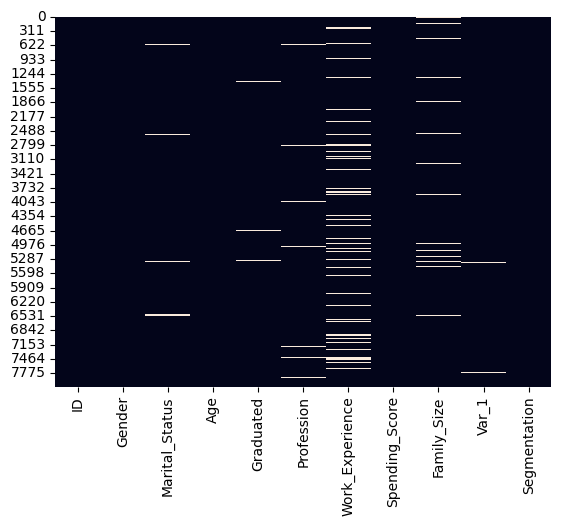

In [132]:
# Identificamos los missing values visualmente
sns.heatmap(df.isnull(), cbar=False)

In [133]:
# Mostrar valores y el porcentaje de valores nulos
df_nan = df.isnull().sum().to_frame()
porcentaje_nan = round((df.isnull().sum()/df.shape[0])*100,2).to_frame()
df_nan.rename({0:'count'}, axis=1,inplace=True)
porcentaje_nan.rename({0:'% nan'}, axis=1,inplace=True)
pd.concat([df_nan,porcentaje_nan],axis=1)

,count,% nan
ID,0,0.00
Gender,0,0.00
Marital_Status,140,1.74
Age,0,0.00
Graduated,78,0.97
Profession,124,1.54
Work_Experience,829,10.28
Spending_Score,0,0.00
Family_Size,335,4.15
Var_1,76,0.94


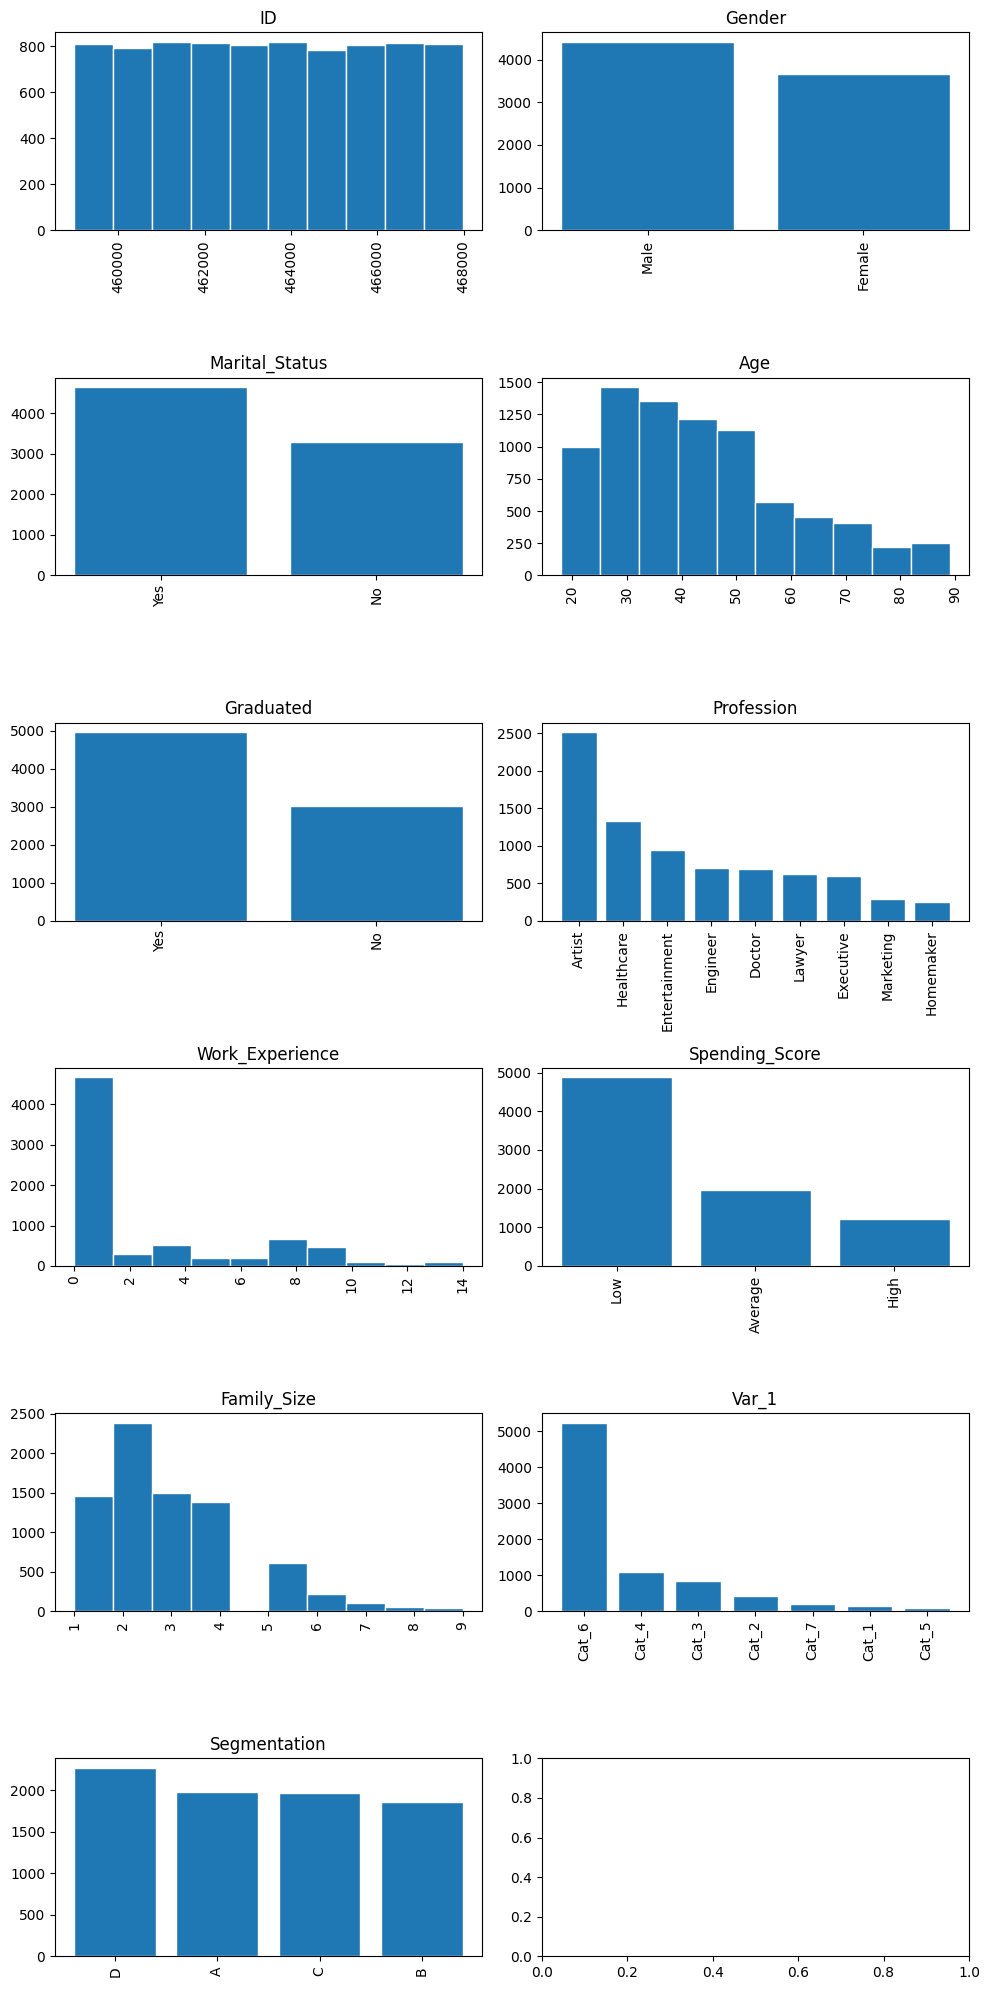

In [134]:
# Visualizar la distribucion de los datos

columnas = df.columns

# Calcular el número de filas y columnas en la disposición de subplots
num_filas = 6
num_columnas = 2

# Crear la figura y los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(10, 20))

# Aplanar los subplots en un arreglo unidimensional
axs = axs.flatten()

# Iterar sobre las columnas y graficar los histogramas en los subplots correspondientes
for i, columna in enumerate(columnas):
    if df[columna].dtype == 'object':
        # Si es una columna categórica, contar las ocurrencias de cada categoría
        counts = df[columna].value_counts()
        axs[i].bar(counts.index, counts.values, edgecolor='white')
        axs[i].set_title(columna)
    else:
        # Si es una columna numérica, graficar el histograma
        axs[i].hist(df[columna], edgecolor='white')
        axs[i].set_title(columna)
    axs[i].tick_params(axis='x', rotation=90)
# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar la figura con los histogramas
plt.show()

# Limpieza de datos

In [135]:
# Eliminar columnas no relevantes
df.drop('ID', axis=1, inplace=True)

In [136]:
# Tratamiento de datos nulos
from sklearn.impute import KNNImputer

# Obtener columnas numéricas y categóricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns
columnas_categoricas = df.select_dtypes(include=['object']).columns

# Realizar la imputación en columnas numéricas
imputer = KNNImputer(n_neighbors=5)
df_numericas_imputadas = pd.DataFrame(imputer.fit_transform(df[columnas_numericas]), columns=columnas_numericas)

# Combinar columnas numéricas imputadas con columnas categóricas originales
df_imputado = pd.concat([df[columnas_categoricas], df_numericas_imputadas], axis=1)

# Realizar la imputación en columnas categóricas
df = df_imputado.fillna(df_imputado.mode().iloc[0])

# Verificar la existencia de datos nulos
df.isnull().sum()

Gender             0
Marital_Status     0
Graduated          0
Profession         0
Spending_Score     0
Var_1              0
Segmentation       0
Age                0
Work_Experience    0
Family_Size        0
dtype: int64

In [137]:
# Reemplazar datos categóricos de la columna "Segmentation" a numérico
df.replace({'A': 0, 'B': 1,'C': 2, 'D': 3}, inplace=True)
df['Segmentation'].unique()

array([3, 0, 1, 2], dtype=int64)

In [138]:
# Cambiar tipo de dato objects a category
for column in df.columns:
    if df[f'{column}'].dtype=='object':
        df[f'{column}'] = df[f'{column}'].astype('category')
# Cambiar tipo de dato float a int
df['Age'] = df['Age'].astype('int64')
df['Family_Size'] = df['Family_Size'].astype('int64')
df.dtypes

Gender             category
Marital_Status     category
Graduated          category
Profession         category
Spending_Score     category
Var_1              category
Segmentation          int64
Age                 float64
Work_Experience       int64
Family_Size           int64
dtype: object

# Analisis de datos

In [139]:
# Create a function that we can re-use
def show_distribution(var_data):
    #from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

Minimum:18.00
Mean:43.47
Median:40.00
Mode:35.00
Maximum:89.00



C:\Users\Alex\AppData\Local\Temp\ipykernel_25552\3723086113.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


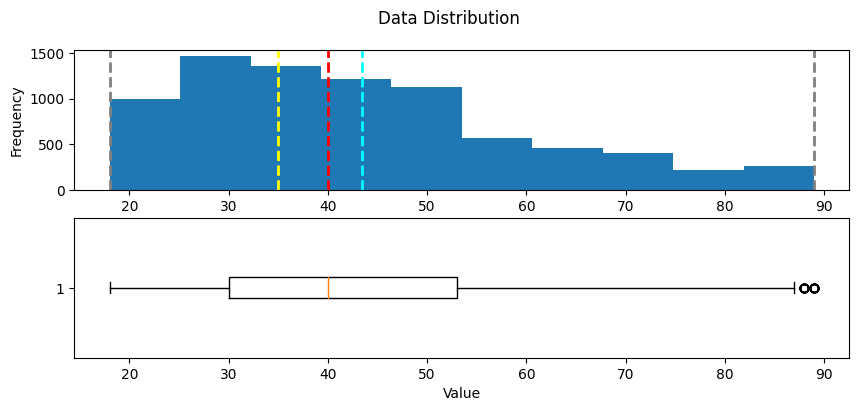

In [140]:
# Call the function
show_distribution(df['Age'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_25552\3606311184.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


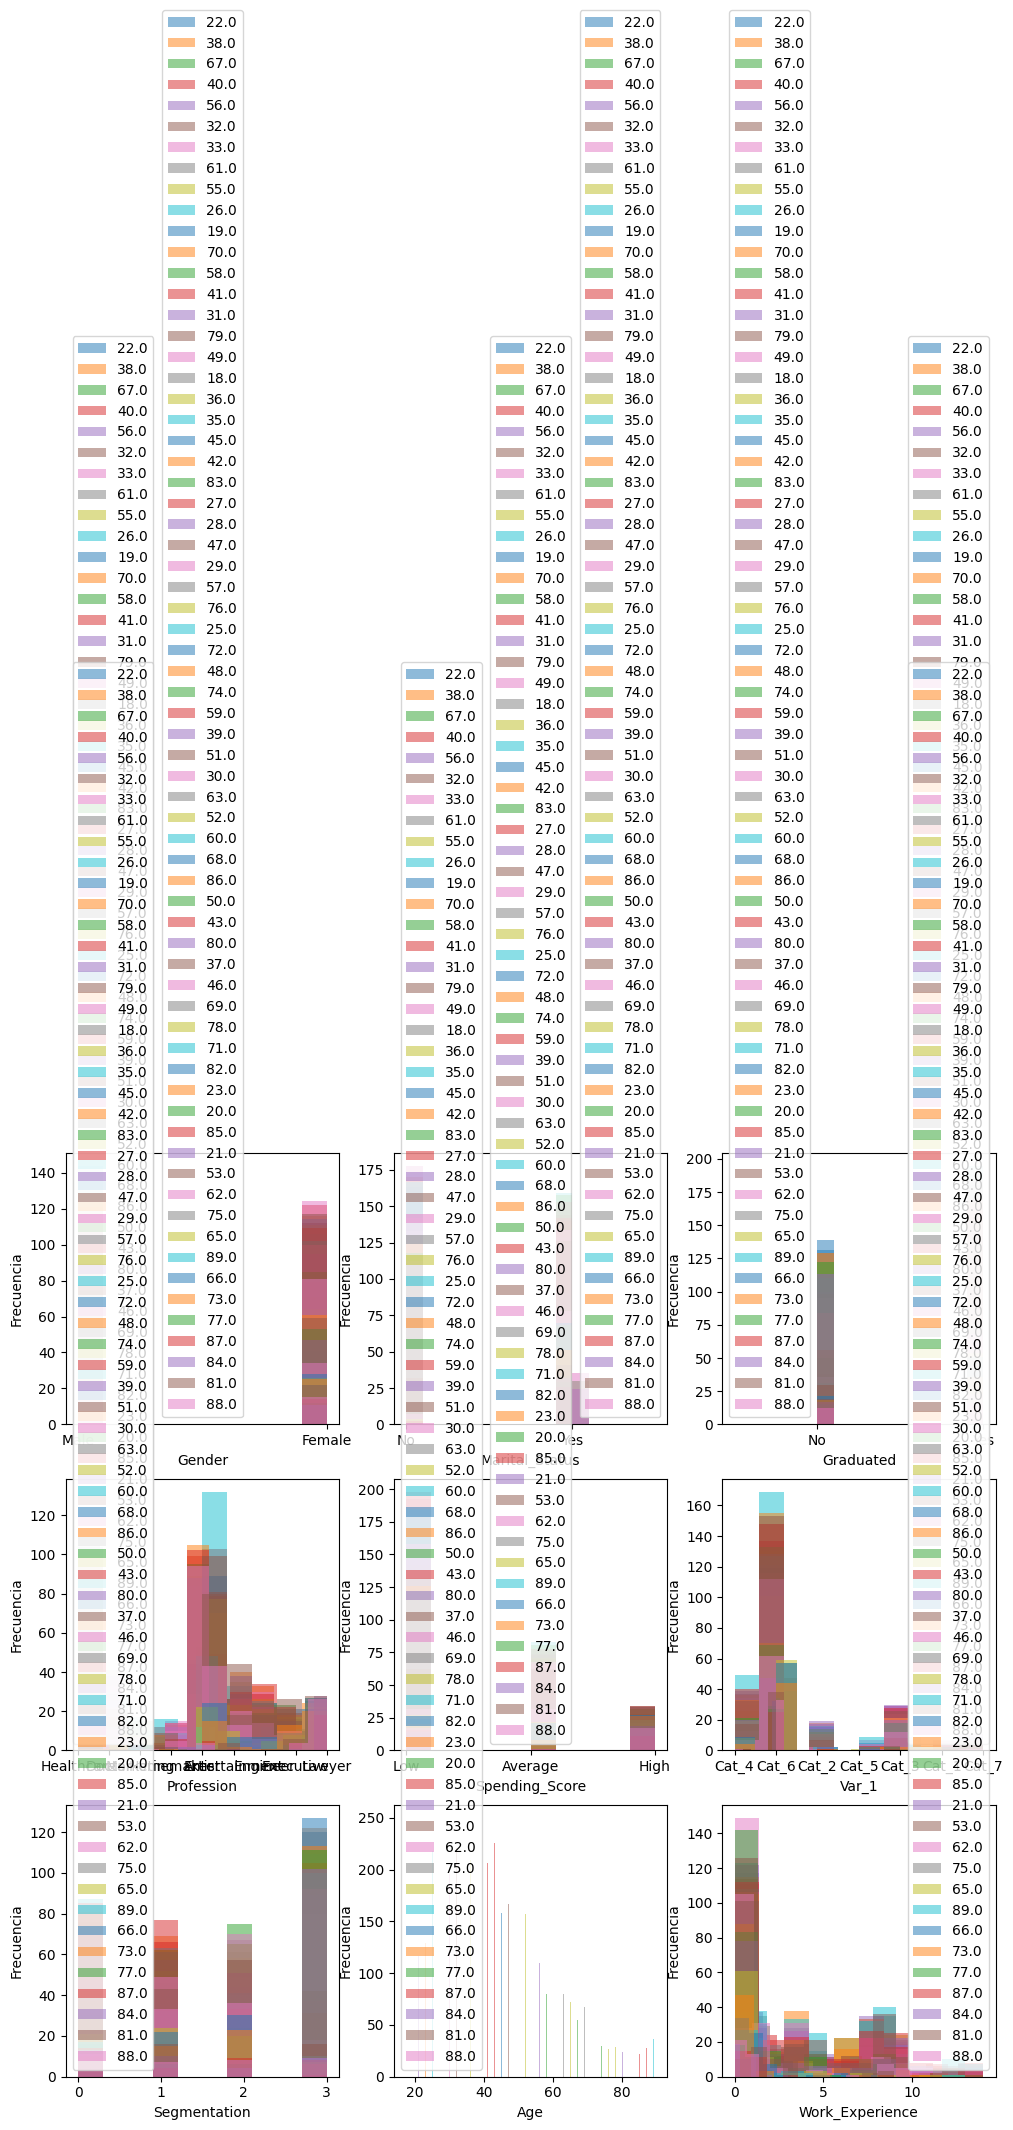

In [141]:
# TARGET VS FEATURES

# Especificar las columnas de features y el target
features = df.columns.to_list()
target = 'Age'

# Crear una matriz de diagramas de dispersión
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Índice para recorrer las features
index = 0

target_categories = df["Age"].unique()
# Crear histogramas para cada feature
for i in range(3):
    for j in range(3):
        feature = features[index]
        for category in target_categories:
            category_data = df[df[target] == category]
            axes[i][j].hist(category_data[feature], bins=10, alpha=0.5, label=category)
        axes[i][j].set_xlabel(feature)
        axes[i][j].set_ylabel('Frecuencia')
        axes[i][j].legend()
        index += 1

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

**<font color=#4863A0></font>**

## <font color="green">===== Exploratory Data Analysis =====</font> 

In [142]:
# Gráfico de barras
plt.style.use("cyberpunk")
plot = df['Segmentation'].value_counts().plot(kind='bar',
                                            title='Customer Segmentation Groups')

OSError: 'cyberpunk' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
# Gráfico de tarta 
plt.style.use("cyberpunk")
plot = df['Segmentation'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Customer Segmentation Groups %')

In [ ]:
# Tabla de contingencia 
pd.crosstab(index=df['Profession'],
            columns=df['Segmentation'], margins=True)

In [ ]:
# Tabla de contingencia 
pd.crosstab(index=df['Gender'],
            columns=df['Segmentation'], margins=True)

In [ ]:
# Tabla de contingencia 
pd.crosstab(index=df['Spending_Score'],
            columns=df['Segmentation'], margins=True)

In [ ]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['Var_1'], columns=df['Segmentation'],
            margins=True).apply(lambda r: r/len(df) *100, axis=1)

In [ ]:
# Gráfico de barras de sobreviviviente segun clase
plt.style.use("cyberpunk")
plot = pd.crosstab(index=df['Segmentation'],
            columns=df['Spending_Score']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

In [ ]:
# matriz de scatterplots(gráficos de dispersión)
plt.style.use("cyberpunk")
nro_columns = 11
sns.pairplot(data=df[df.columns[0:nro_columns+1]],
             hue="Age")
plt.show()

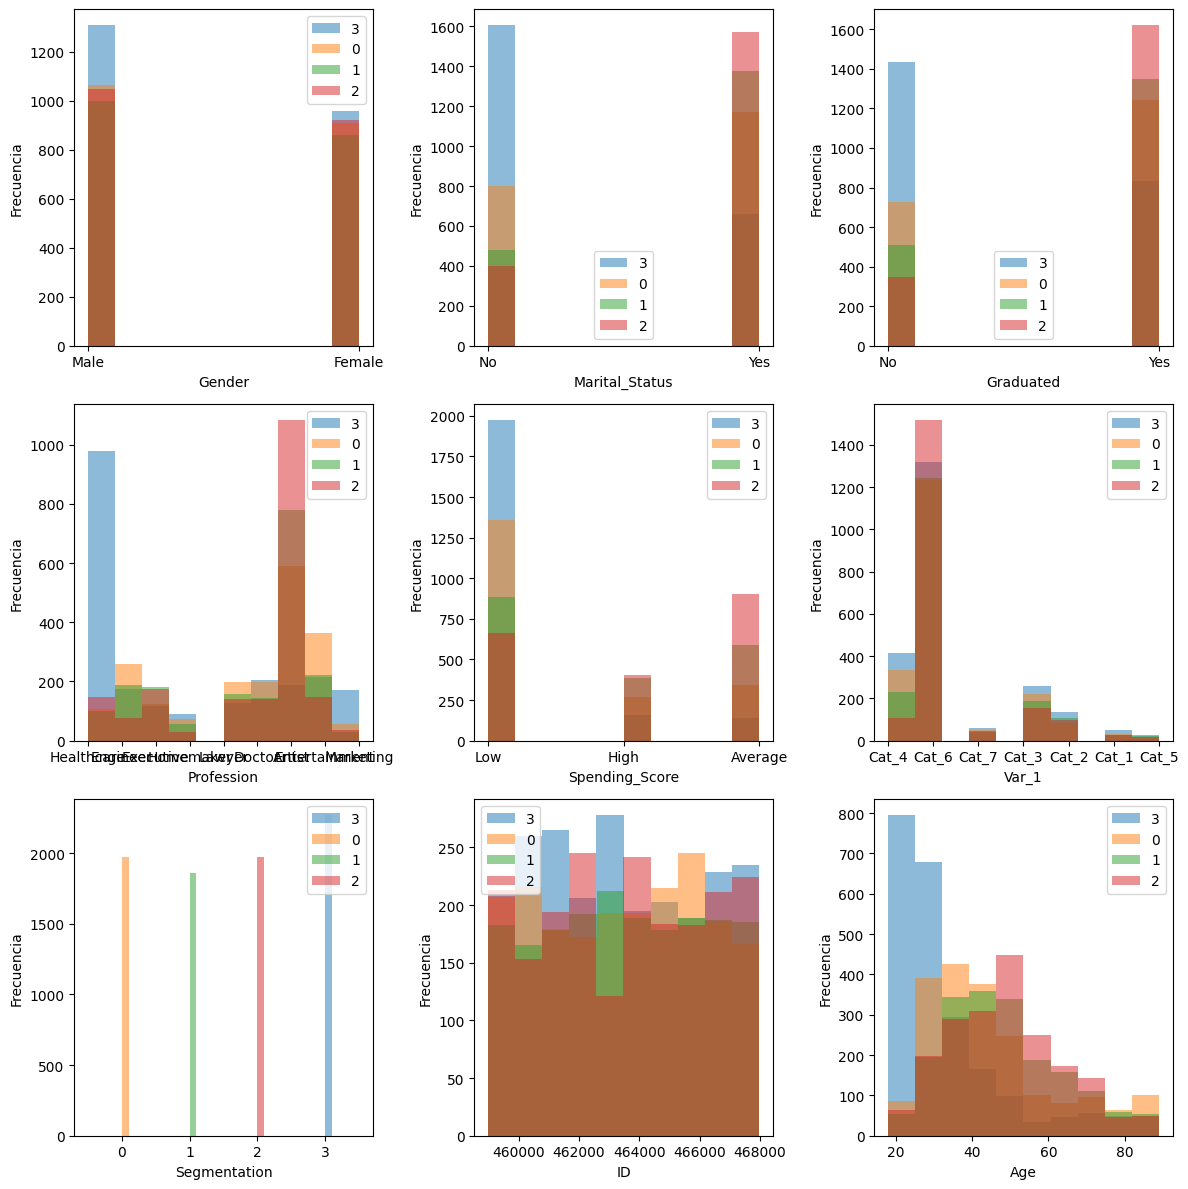

In [ ]:
# TARGET VS FEATURES

# Especificar las columnas de features y el target
features = df.columns.to_list()
target = 'Segmentation'

# Crear una matriz de diagramas de dispersión
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Índice para recorrer las features
index = 0

target_categories = df["Segmentation"].unique()
# Crear histogramas para cada feature
for i in range(3):
    for j in range(3):
        feature = features[index]
        for category in target_categories:
            category_data = df[df[target] == category]
            axes[i][j].hist(category_data[feature], bins=10, alpha=0.5, label=category)
        axes[i][j].set_xlabel(feature)
        axes[i][j].set_ylabel('Frecuencia')
        axes[i][j].legend()
        index += 1

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

In [ ]:
# GENERO VS FEATURES

# Especificar las columnas de features y el target
features = df.columns.to_list()
target = 'gender'

# Crear una matriz de diagramas de dispersión
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Índice para recorrer las features
index = 0

target_categories = df["gender"].unique()
# Crear histogramas para cada feature
for i in range(3):
    for j in range(3):
        feature = features[index]
        for category in target_categories:
            category_data = df[df[target] == category]
            axes[i][j].hist(category_data[feature], bins=10, alpha=0.5, label=category)
        axes[i][j].set_xlabel(feature)
        axes[i][j].set_ylabel('Frecuencia')
        axes[i][j].legend()
        index += 1

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

In [ ]:
df.columns

In [ ]:
df_WE = df[["Gender","Segmentation","Work_Experience"]].groupby(["Gender","Segmentation","Work_Experience"], as_index=False).mean()
df_WE

<font>Pivot method</font>

In [ ]:
df_pivot = df_WE.pivot(index='Segmentation', columns='Gender')
df_pivot

In [ ]:
# Correlation
sns.regplot(x='Age',y='Work_Experience', data = df)
plt.ylim(0,)

In [ ]:
# copy
df_copy = df.copy(deep=True)

# drop NA
df_copy.dropna(inplace=True)
df_copy.reset_index(inplace=True)
df_copy

In [ ]:
#from statsmodels import stats
from scipy import stats
# Pearson correlation and p-value
pearson_correlation, p_value = stats.pearsonr(df_copy['Age'],df_copy['Work_Experience'])
print(f'{pearson_correlation}')
print(f'{p_value}')

# RELATION BETWEEN 2 CATEGORICAL VARIABLES 
# 'CHI-SQUARE' TEST FOR ASSOCIATION BETWEEN 2 CATEGORICAL VARIABLES

In [ ]:
df.corr()

## <font color="green">===== Data Preprocessing =====</font> 

**<font color=#4863A0>Drop rows that are irrelevants</font>**

In [ ]:
df["gender"].value_counts()

In [ ]:
index_row_drop = (df[df["gender"]=="Other"]).index
df.drop(index_row_drop, axis=0, inplace=True)
df["gender"].value_counts()

**<font color=#4863A0>Treatment of outliers</font>**

In [ ]:
# boxplot general
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df);

In [ ]:
df.columns.to_list()

In [ ]:
# TRATAMIENTO DE OUTLIERS
from feature_engine.outliers import Winsorizer
features = ["bmi","blood_glucose_level"]
# The values to cap variables are determined using: a Gaussian approximation. the inter-quantile range proximity rule (IQR)
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', # aplicar para ambos lados de la caja y bigotes
                          fold=1.5,
                          variables=features) # variables sobre las cuales realizar el tratamiento de outliers
# entrenar modelo 
windsoriser.fit(df)
# transformar en base a los datos entrenados
df = windsoriser.transform(df)

In [ ]:
# show results
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df);

**<font color=#4863A0>Categorical to dummies</font>**

In [ ]:
def convert_categorical_number(df, column_name):
    new_df = df.copy(deep=True)
    # convertir de categorico a numerico
    df_dummies = pd.get_dummies(df[f'{column_name}'], drop_first = True) 
    # Concatenamos las variables binarias al DataFrame
    new_df = pd.concat([new_df, df_dummies], axis = 1)
    # Eliminamos la vairable original race
    new_df.drop(columns=[f'{column_name}'], axis=1, inplace=True)
    return new_df

In [ ]:
# convertir de categorico a numerico
new_df = convert_categorical_number(df,"gender")
new_df = convert_categorical_number(new_df,"smoking_history")
# renombrar columna
#new_df.rename(columns = {'Male': 'Gender_Male'}, inplace=True)
new_df.head()